### Dataset description:
The dataset that we will be using comes from the UCI repository.
We will use it to perform energy analysis on 768 buildings. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

### Plan for the lab:

- Open the dataset
- Explore the dataset
  - Make sure that there are no missing values
  - Make sure that there are no erroneous values (e.g. words where only numbers should be)
- Split the data in train and test sets
- Scale the data
- Train two regression models on the data
- Compare the performance of the two models on the test data

In [1]:
# Import the basic libraries: pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import the dataset

data = pd.read_csv('Energy_efficiency_dataset.csv')
print(data.columns)
data.head()

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Check if the data contains any missing values
print(data.isnull().sum())

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


In [4]:
# Check the data types for each column
data.dtypes
# Orientation and Distribution are categorical, and the numbers represent categories

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

In [6]:
# Describe the dataset
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
# split the dataset into features and target variables
X = data.iloc[:, :-2] # iloc means: index location, We only want to have the last two collumns of X and last two collumns of y
y = data.iloc[:, -2:]

# X is typically capital and y is typically small letter

In [8]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [9]:
y.head()

,Heating_Load,Cooling_Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


Text(0, 0.5, 'Frequency')

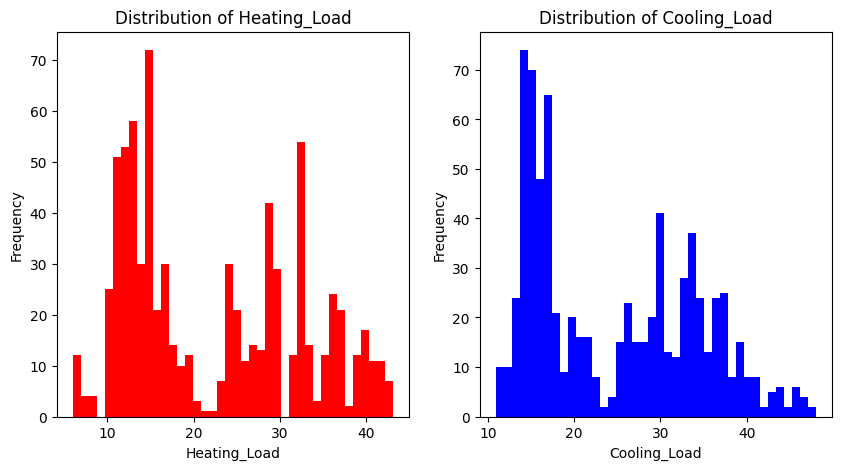

In [10]:
# Create two barplots to show the distribution of the target variables
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y['Heating_Load'], bins=40, color='red')
plt.title('Distribution of Heating_Load')
plt.xlabel('Heating_Load')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y['Cooling_Load'], bins=40, color='blue')
plt.title('Distribution of Cooling_Load')
plt.xlabel('Cooling_Load')
plt.ylabel('Frequency')


In [11]:
# Print the minimum, maximum and interquartile ranges values of y['Heating_Load'] and y['Cooling_Load']
print(y['Heating_Load'].min())
print(y['Heating_Load'].max())
print(y['Heating_Load'].quantile([0.25, 0.75]))

print(y['Cooling_Load'].min())
print(y['Cooling_Load'].max())
print(y['Cooling_Load'].quantile([0.25, 0.75]))

6.01
43.1
0.25    12.9925
0.75    31.6675
Name: Heating_Load, dtype: float64
10.9
48.03
0.25    15.6200
0.75    33.1325
Name: Cooling_Load, dtype: float64


Text(0, 0.5, 'Heating Load')

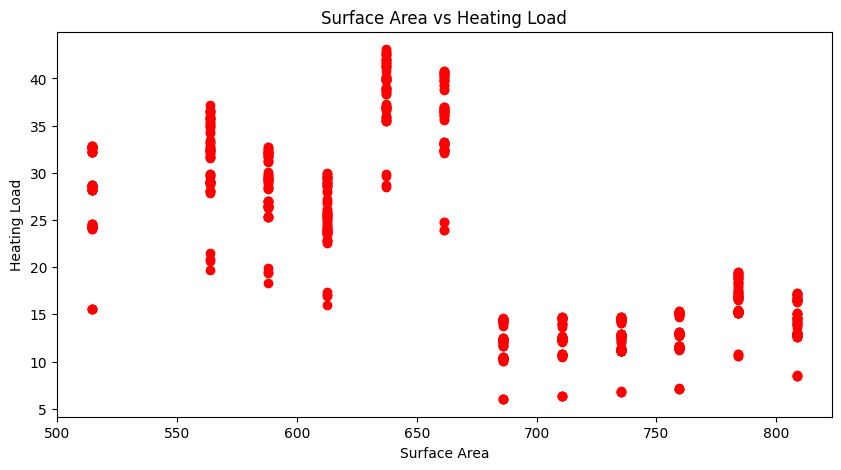

In [12]:
# Create a scatterplot to show the relationship between the surface area and the heating load
plt.figure(figsize=(10, 5))
plt.scatter(X['Surface_Area'], y['Heating_Load'], color='red')
plt.title('Surface Area vs Heating Load')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

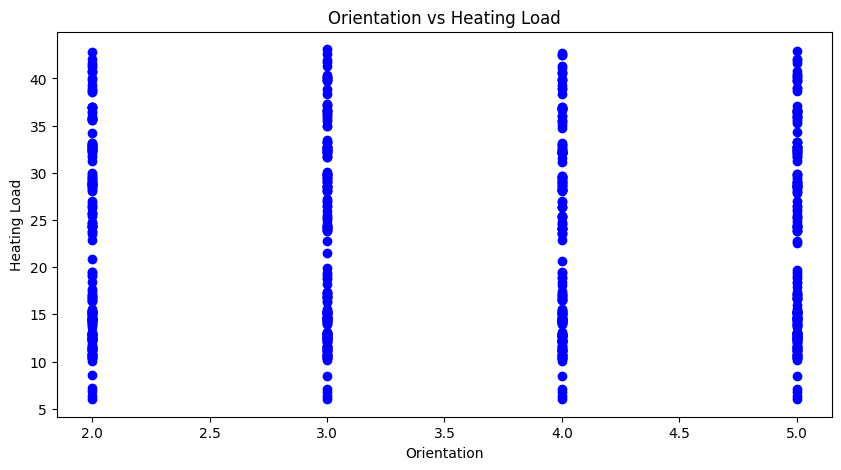

In [13]:
# Create a scatterplot to show the relationship between the orientation and the heating load
plt.figure(figsize=(10, 5))
plt.scatter(X['Orientation'], y['Heating_Load'], color='blue')
plt.title('Orientation vs Heating Load')
plt.xlabel('Orientation')
plt.ylabel('Heating Load')

## Observation:
The range of values for the surface area goes from a minimum of 500 to a maximum of 800 (square feet). The height goes from 3.5 to 7. We should standardize our dataset to avoid the negative impact of having features with different ranges.

It is good practice to standardize our features based on the values in the train set.

In [14]:
# Select the numerical features
numerical_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']

# we DO NOT standardize categorical features

In [15]:
# Split the dataset into training and testing sets
# Since this is a regression, stratification is not trivial. As of now, it's just random, but maybe there are better strategies?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # random state is there to fix the values

# 20 % of our samples will be in the test set, and 80 % of tour samples will be in the train test
# the smaller the test set the more samples you will need to learn from 

In [16]:
# standardize the features of the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
# select the numerical features from the training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features]) # substract the average and divide the standard deviation
# we are only doing an operation on the numerical features 
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [17]:
X_train.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
603,-0.210976,0.142904,-1.709544,0.957784,-0.983844,5,1.231324,2
118,-0.020757,-0.135646,2.272905,-1.220288,1.016421,4,-1.026614,2
247,1.310775,-1.249844,-0.002780,-1.220288,1.016421,5,-1.026614,5
157,0.549900,-0.692745,-0.002780,-0.675770,1.016421,3,-1.026614,3
468,-0.971851,0.978553,-0.002780,0.957784,-0.983844,2,0.102355,4


Text(0, 0.5, 'Heating Load')

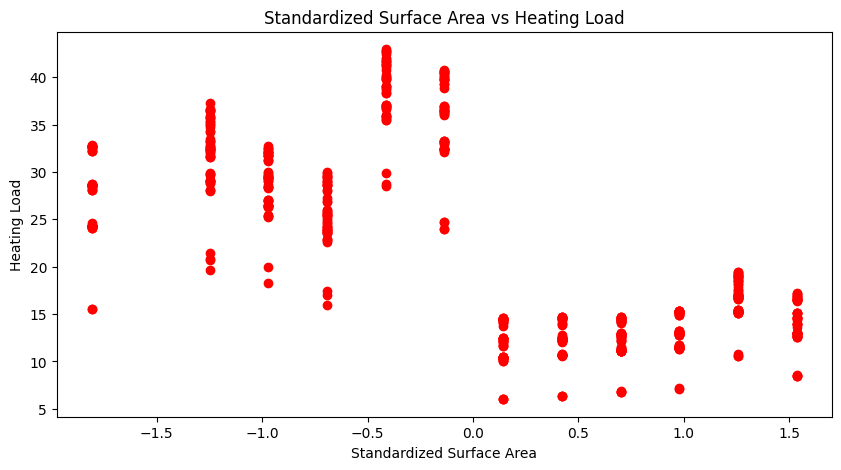

In [18]:
# Create a scatterplot to show the relationship between the Standardized Surface Area and the heating load
plt.figure(figsize=(10, 5))
plt.scatter(X_train['Surface_Area'], y_train['Heating_Load'], color='red')
plt.title('Standardized Surface Area vs Heating Load')
plt.xlabel('Standardized Surface Area')
plt.ylabel('Heating Load')

In [19]:
# Print the average heating load for the training set and the testing set
print(y_train['Heating_Load'].mean())
print(y_test['Heating_Load'].mean())
# checking if the test and train sets are somewhat similar (it's a brute approach, since we are only chencking the mean nothing else)

22.179511400651467
22.816298701298702


In [20]:
# Print the average cooling load for the training set and the testing set
print(y_train['Cooling_Load'].mean())
print(y_test['Cooling_Load'].mean())

24.518143322475574
24.865324675324675


## Observation:
We did not stratify, but we were lucky enough: heating and cooling load have a similar mean in the training and test set. Let's go on with this for now.

In [21]:
# train a linear regression model, using 5 fold cross validation. the score is the negative root mean squared error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # cross validation

regressor = LinearRegression()
regressor.fit(X_train, y_train['Heating_Load'])
scores = cross_val_score(regressor, X_train, y_train['Heating_Load'], cv=5, scoring='neg_root_mean_squared_error')
regressor.fit(X_train, y_train['Heating_Load'])
print(scores.mean())

-2.8868931664713338


In [22]:
# train a random lasso regression model, using 5 fold cross validation.

from sklearn.linear_model import Lasso

regressor2 = Lasso()
regressor2.fit(X_train, y_train['Heating_Load'])
scores2 = cross_val_score(regressor2, X_train, y_train['Heating_Load'], cv=5, scoring='neg_root_mean_squared_error')
print(scores2.mean())

-3.355076019150283


In [23]:
# train a ridge regression model, using 5 fold cross validation.

from sklearn.linear_model import Ridge

regressor3 = Ridge()
regressor3.fit(X_train, y_train['Heating_Load'])
scores3 = cross_val_score(regressor3, X_train, y_train['Heating_Load'], cv=5, scoring='neg_root_mean_squared_error')
print(scores3.mean())

-2.883003761499323


In [24]:
# test all the regressors on the test set
y_pred = regressor.predict(X_test)
y_pred2 = regressor2.predict(X_test)
y_pred3 = regressor3.predict(X_test)

# We do not know what the y is and that's what we predict

In [28]:
# calculate the root mean squared error for both regressors
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Root Mean Squared Error Linear Regression", sqrt(mean_squared_error(y_test['Heating_Load'], y_pred)))
print("Root Mean Squared Error Lasso Regression", sqrt(mean_squared_error(y_test['Heating_Load'], y_pred2)))
print("Root Mean Squared Error Ridge Regression", sqrt(mean_squared_error(y_test['Heating_Load'], y_pred3)))

print("Mean Absolute Error Linear Regression", mean_absolute_error(y_test['Heating_Load'], y_pred))
print("Mean Absolute Error Lasso Regression", mean_absolute_error(y_test['Heating_Load'], y_pred2))
print("Mean Absolute Error Ridge Regression", mean_absolute_error(y_test['Heating_Load'], y_pred3))

# lower error is good here

Root Mean Squared Error Linear Regression 3.1777219428428567
Root Mean Squared Error Lasso Regression 3.885462240373993
Root Mean Squared Error Ridge Regression 3.1980286362852306
Mean Absolute Error Linear Regression 2.222082688621438
Mean Absolute Error Lasso Regression 2.7990134128605098
Mean Absolute Error Ridge Regression 2.240798069921859


Text(0, 0.5, 'Predicted Heating Load')

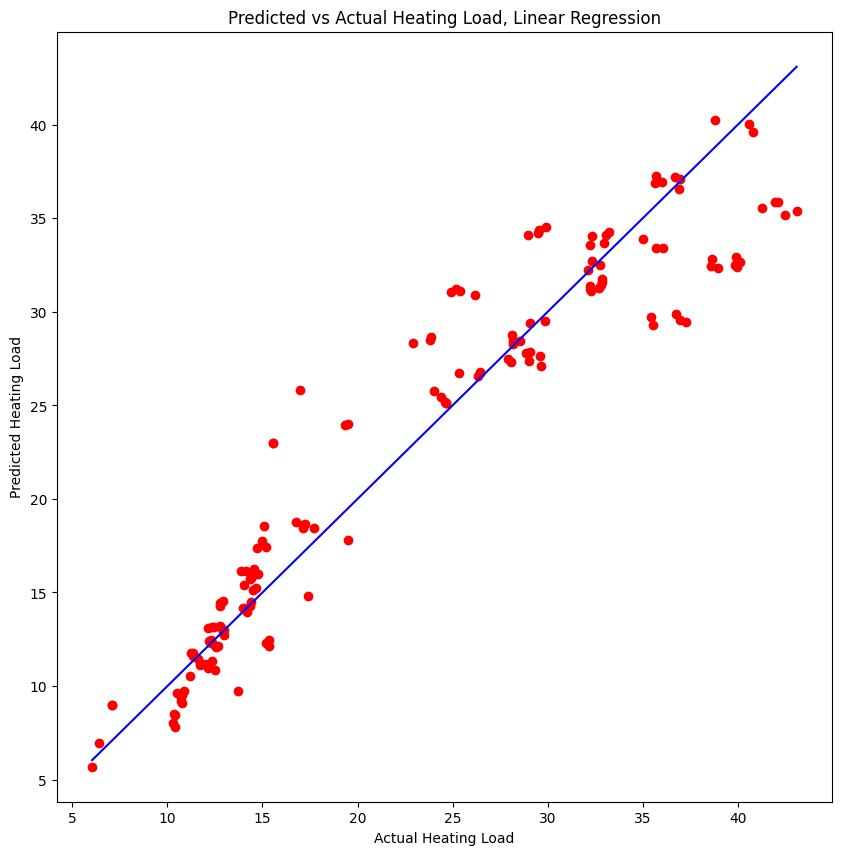

In [26]:
# Plot the predicted values against the actual values for the linear regression model. Add a 45 degree line to show the perfect prediction
plt.figure(figsize=(10, 10))
plt.scatter(y_test['Heating_Load'], y_pred, color='red')
plt.plot([y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], [y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], color='blue')
plt.title('Predicted vs Actual Heating Load, Linear Regression')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

# if they were all on the lower or upper side it would mean that the line is not fitting very well

Text(0, 0.5, 'Predicted Heating Load')

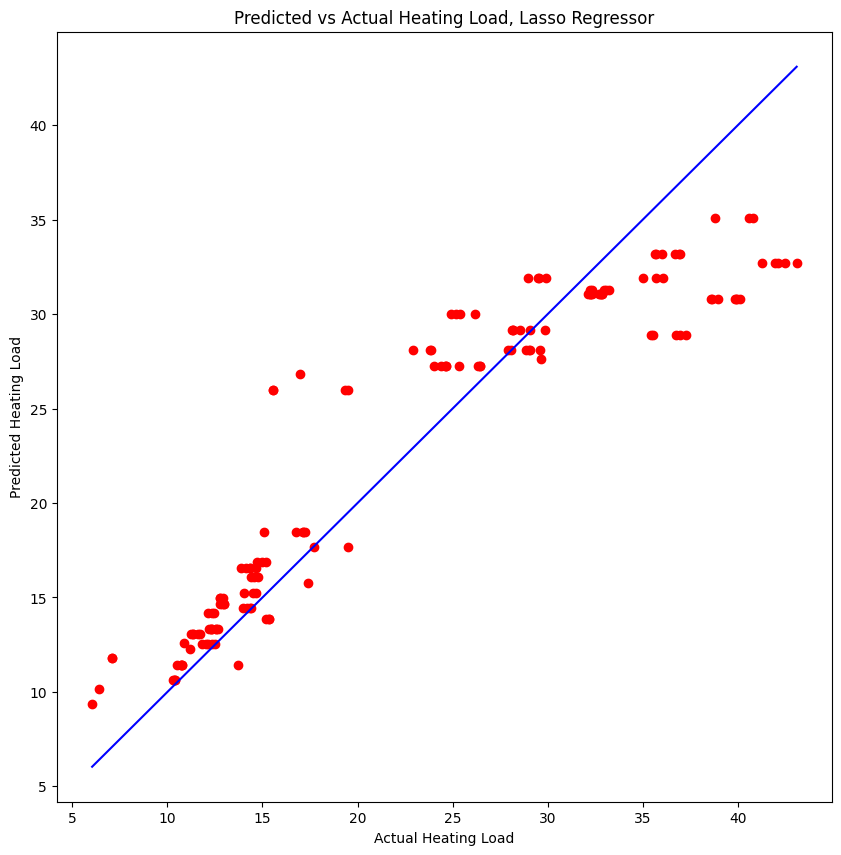

In [26]:
# Plot the predicted values against the actual values for the random Lasso regression model. Add a 45 degree line to show the perfect prediction
plt.figure(figsize=(10, 10))
plt.scatter(y_test['Heating_Load'], y_pred2, color='red')
plt.plot([y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], [y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], color='blue')
plt.title('Predicted vs Actual Heating Load, Lasso Regressor')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

Text(0, 0.5, 'Predicted Heating Load')

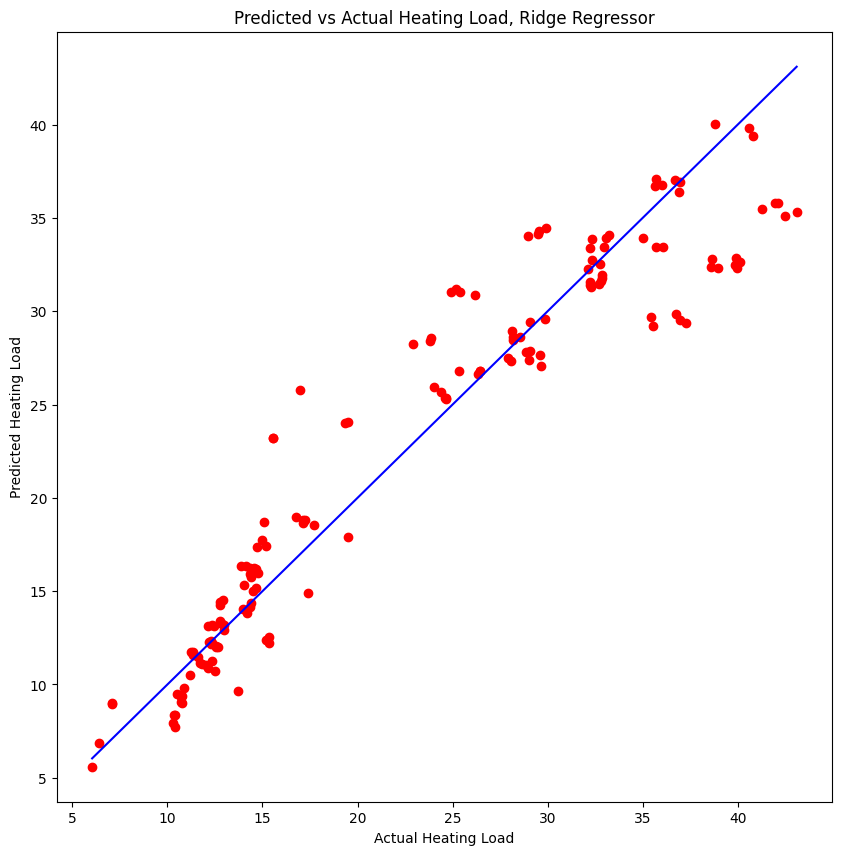

In [27]:
# Plot the predicted values against the actual values for the Ridge regression model. Add a 45 degree line to show the perfect prediction
plt.figure(figsize=(10, 10))
plt.scatter(y_test['Heating_Load'], y_pred3, color='red')
plt.plot([y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], [y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], color='blue')
plt.title('Predicted vs Actual Heating Load, Ridge Regressor')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

## Caveat:
You will not always be lucky. We need better strategies to estimate the error of our regressors.

One such strategy can be to do repeated splits, and to average the performance of the various regressors for each split.
We will also be more rigorous with the standardization process.

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def get_error_estimation(range, model):
    if model == 'linear':
        model = LinearRegression()
        param_grid = {
            'model__fit_intercept': [True, False],
            }
    elif model == 'lasso':
        model = Lasso()
        param_grid = {
                'model__alpha': [0.1, 1.0], # both here and
            }
    elif model == 'ridge':
        model = Ridge()
        param_grid = {
                'model__alpha': [0.1, 1.0], # here, choosing 0 is equivalent to ordinary least squares, which is solved by the LinearRegression
            }
    else:
        print("Model not found")
        return
            
    performance = []
    for random in range:
        # Split data into training and test sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

        # Create a pipeline with standardization and model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),  # Standardize features
            ('model', model)  # Apply the model
        ])

        # Set up cross-validation on the training data (k-fold)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)

        # Perform grid search with cross-validation to find the best hyperparameters
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_root_mean_squared_error')

        # Fit the model with grid search on the training data
        grid_search.fit(X_train, y_train)

        # Get the best model and its parameters
        best_model = grid_search.best_estimator_
        # print("Best hyperparameters: ", grid_search.best_params_)

        # Evaluate the best model on the test data
        y_pred = best_model.predict(X_test)
        test_score = mean_absolute_error(y_test, y_pred)
        # print("Test set mean absolute error: ", test_score)
        performance.append(test_score)
    return performance


In [29]:
list_of_linear_model_performances = get_error_estimation(range(1000), 'linear')

In [30]:
list_of_lasso_model_performances = get_error_estimation(range(1000), 'lasso')

In [31]:
list_of_ridge_model_performances = get_error_estimation(range(1000), 'ridge')

In [32]:
max_error = max(max(list_of_linear_model_performances), max(list_of_lasso_model_performances), max(list_of_ridge_model_performances))

Number of random states: 1, Linear model, MAE: 2.2412, Lasso model, MAE: 2.3903, Ridge model, MAE: 2.2366
Number of random states: 5, Linear model, MAE: 2.2803, Lasso model, MAE: 2.3601, Ridge model, MAE: 2.2775
Number of random states: 10, Linear model, MAE: 2.2567, Lasso model, MAE: 2.3316, Ridge model, MAE: 2.2552
Number of random states: 50, Linear model, MAE: 2.225, Lasso model, MAE: 2.2401, Ridge model, MAE: 2.1641
Number of random states: 100, Linear model, MAE: 2.2014, Lasso model, MAE: 2.243, Ridge model, MAE: 2.1695
Number of random states: 200, Linear model, MAE: 2.1889, Lasso model, MAE: 2.2421, Ridge model, MAE: 2.1674
Number of random states: 500, Linear model, MAE: 2.1869, Lasso model, MAE: 2.2499, Ridge model, MAE: 2.1735
Number of random states: 1000, Linear model, MAE: 2.1912, Lasso model, MAE: 2.2567, Ridge model, MAE: 2.1776


Text(0.5, 1.0, 'Mean Absolute Error for Ridge Regression')

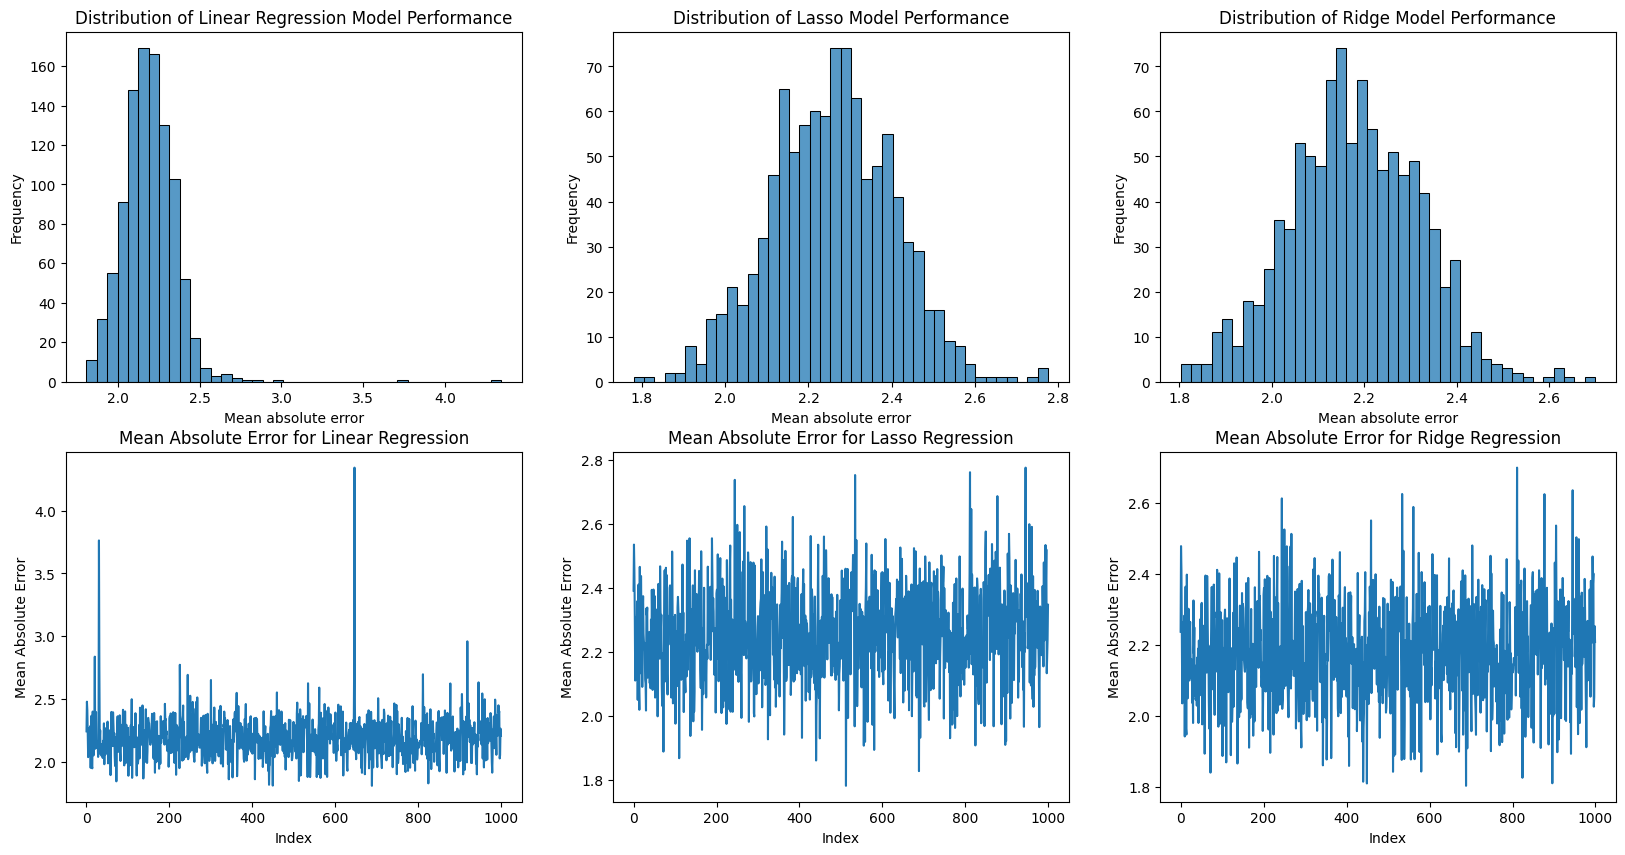

In [35]:
import seaborn as sns

for number in [1, 5, 10, 50, 100, 200, 500, 1000]:
    print(f"Number of random states: {number}, Linear model, MAE: {round(sum(list_of_linear_model_performances[:number])/number, 4)}, Lasso model, MAE: {round(sum(list_of_lasso_model_performances[:number])/number, 4)}, Ridge model, MAE: {round(sum(list_of_ridge_model_performances[:number])/number, 4)}")

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
sns.histplot(list_of_linear_model_performances, bins=40)
#plt.xlim(0, max_error)
plt.xlabel('Mean absolute error')
plt.ylabel('Frequency')
plt.title('Distribution of Linear Regression Model Performance')

plt.subplot(2, 3, 2)
sns.histplot(list_of_lasso_model_performances, bins=40)
#plt.xlim(0, max_error)
plt.xlabel('Mean absolute error')
plt.ylabel('Frequency')
plt.title('Distribution of Lasso Model Performance')

plt.subplot(2, 3, 3)
sns.histplot(list_of_ridge_model_performances, bins=40)
#plt.xlim(0, max_error)
plt.xlabel('Mean absolute error')
plt.ylabel('Frequency')
plt.title('Distribution of Ridge Model Performance')

plt.subplot(2, 3, 4)
sns.lineplot(x=range(len(list_of_linear_model_performances)), y=list_of_linear_model_performances)

#plt.ylim(0, max(list_of_linear_model_performances))

plt.xlabel('Index')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Linear Regression')

plt.subplot(2, 3, 5)
sns.lineplot(x=range(len(list_of_lasso_model_performances)), y=list_of_lasso_model_performances)

#plt.ylim(0, max(list_of_lasso_model_performances))

plt.xlabel('Index')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Lasso Regression')

plt.subplot(2, 3, 6)
sns.lineplot(x=range(len(list_of_ridge_model_performances)), y=list_of_ridge_model_performances)

#plt.ylim(0, max(list_of_ridge_model_performances))

plt.xlabel('Index')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Ridge Regression')




# End of Lab3!